# Cancer Type Prediction

## Import Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import os
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

## Load Data

In [4]:
from google.colab import files
files.upload()

Saving cancer_gene_expression.csv to cancer_gene_expression.csv


In [5]:
os.listdir()

['.config', 'cancer_gene_expression.csv', 'sample_data']

In [6]:
df = pd.read_csv("cancer_gene_expression.csv")

## Data Preprocessing 

In [7]:
df.shape

(801, 8001)

In [11]:
df.columns[0:3]

Index(['gene_1', 'gene_2', 'gene_3'], dtype='object')

In [12]:
df.columns[-1]

'Cancer_Type'

In [13]:
datanull = df.isnull().sum()
g = [i for i in datanull if i > 0]

print('columns with missing values : %d'%len(g))

columns with missing values : 0


In [14]:
df['Cancer_Type'].value_counts()

BRCA    300
KIRC    146
LUAD    141
PRAD    136
COAD     78
Name: Cancer_Type, dtype: int64

In [15]:
x = df.iloc[:,0:-1]
x.columns

Index(['gene_1', 'gene_2', 'gene_3', 'gene_4', 'gene_5', 'gene_6', 'gene_7',
       'gene_8', 'gene_9', 'gene_10',
       ...
       'gene_7991', 'gene_7992', 'gene_7993', 'gene_7994', 'gene_7995',
       'gene_7996', 'gene_7997', 'gene_7998', 'gene_7999', 'gene_8000'],
      dtype='object', length=8000)

In [19]:
y = df.iloc[:,-1]
y.name

'Cancer_Type'

## Encode Labels

In [20]:
label_encoder = LabelEncoder()

In [21]:
label_encoder.fit(y)
y = label_encoder.transform(y)

In [22]:
labels = label_encoder.classes_
classes = np.unique(y)
nclasses = np.unique(y).shape[0]

## Splitting the Data

In [25]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2)

## Normalization

In [26]:
min_max_scaler = MinMaxScaler()

In [27]:
X_train = min_max_scaler.fit_transform(X_train)
X_val = min_max_scaler.fit_transform(X_val)
X_test = min_max_scaler.fit_transform(X_test)

## Build The Model

In [30]:
model = Sequential()

model.add(Dense(40, input_dim = X_train.shape[1], activation = 'relu'))
model.add(Dense(20, activation = 'relu'))
model.add(Dense(nclasses, activation = 'softmax'))

opt_adam = keras.optimizers.Adam(learning_rate = 0.001)

model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(), optimizer = opt_adam, metrics = [keras.metrics.SparseCategoricalAccuracy()])

In [31]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size = 32, epochs=200, verbose = 1)

Epoch 1/200
16/16 [==============================] - 6s 16ms/step - loss: 1.3619 - sparse_categorical_accuracy: 0.4395 - val_loss: 1.2666 - val_sparse_categorical_accuracy: 0.6094
Epoch 2/200
16/16 [==============================] - 0s 6ms/step - loss: 0.9212 - sparse_categorical_accuracy: 0.6641 - val_loss: 0.7508 - val_sparse_categorical_accuracy: 0.7344
Epoch 3/200
16/16 [==============================] - 0s 6ms/step - loss: 0.5751 - sparse_categorical_accuracy: 0.9238 - val_loss: 0.4520 - val_sparse_categorical_accuracy: 0.8984
Epoch 4/200
16/16 [==============================] - 0s 6ms/step - loss: 0.3024 - sparse_categorical_accuracy: 0.9805 - val_loss: 0.2552 - val_sparse_categorical_accuracy: 0.9609
Epoch 5/200
16/16 [==============================] - 0s 5ms/step - loss: 0.1738 - sparse_categorical_accuracy: 0.9922 - val_loss: 0.1670 - val_sparse_categorical_accuracy: 0.9844
Epoch 6/200
16/16 [==============================] - 0s 6ms/step - loss: 0.1092 - sparse_categorical_acc

In [32]:
predictions = model.predict(X_test)
accuracy = model.evaluate(X_test, y_test, verbose = 0)

6/6 [==============================] - 0s 3ms/step


In [33]:
for index, entry in enumerate(predictions[0:20,:]):
  print('Predicted : %d, Actual : %d'%(np.argmax(entry), y_test[index]))

Predicted : 4, Actual : 4
Predicted : 0, Actual : 0
Predicted : 0, Actual : 0
Predicted : 0, Actual : 0
Predicted : 3, Actual : 3
Predicted : 2, Actual : 2
Predicted : 2, Actual : 2
Predicted : 4, Actual : 4
Predicted : 4, Actual : 4
Predicted : 4, Actual : 4
Predicted : 0, Actual : 0
Predicted : 0, Actual : 0
Predicted : 0, Actual : 0
Predicted : 2, Actual : 2
Predicted : 0, Actual : 0
Predicted : 3, Actual : 3
Predicted : 2, Actual : 2
Predicted : 0, Actual : 0
Predicted : 3, Actual : 3
Predicted : 0, Actual : 0


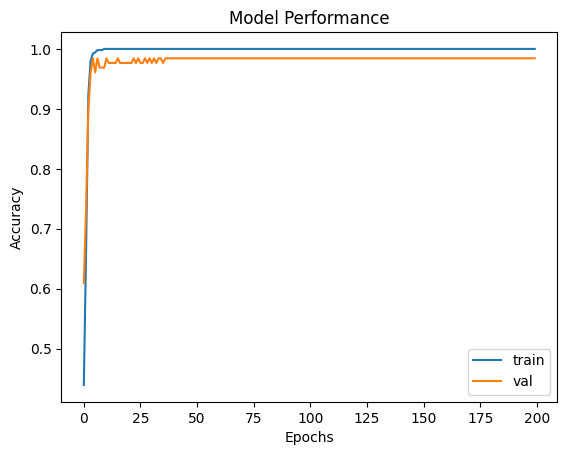

In [34]:
plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.title('Model Performance')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'val'], loc = 'lower right')
plt.show()

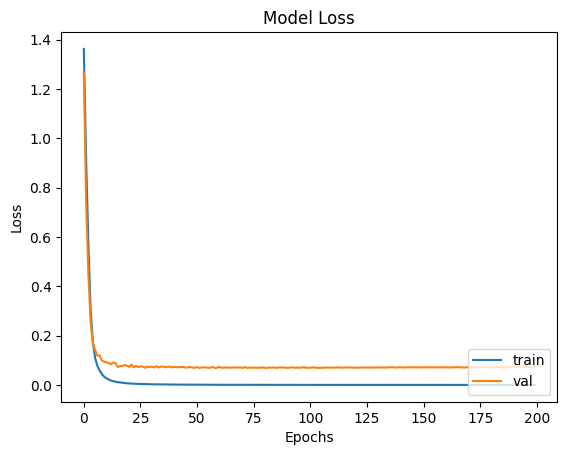

In [35]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'val'], loc = 'lower right')
plt.show()